In [ ]:
# Get imports working in virtualenv
import sys
!{sys.executable} -m pip install pandas sklearn keras scipy tensorflow scikit-image

In [1]:
# Imports
import os
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import scipy.misc
from skimage import transform
import warnings
import time
import h5py

## V1 Dataset

In [6]:
warnings.filterwarnings("ignore")

#convertering list of training data paths to df
train_dir = '../datasets/plant-seedlings-classification/train/'
train_list = os.listdir(train_dir)
categories = sorted(train_list, key=str.lower)
records = []
for category in train_list:
    img_list = os.listdir(train_dir + category)
    for img in img_list:
        records.append((img,category))
        
df_train = pd.DataFrame.from_records(records,columns=['image','category'])

print(df_train.head())



#looking at the test data
test_dir = '../datasets/plant-seedlings-classification/test/'
test_list = os.listdir(test_dir)
print('Train Data', len(df_train.index))
print('Test Data',type(test_list),len(test_list))
print('categories',os.listdir(train_dir))
print('# of categories', len(os.listdir(train_dir)))

           image          category
0  ed443bd4c.png  Loose Silky bent
1  f3d10b887.png  Loose Silky bent
2  58d70ef74.png  Loose Silky bent
3  c88c61e2b.png  Loose Silky bent
4  5ca0fcfba.png  Loose Silky bent
Train Data 4718
Test Data <class 'list'> 793
categories ['Loose Silky bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Sugar beet', 'Black grass', 'Common wheat', 'Common Chickweed', 'Cleavers', 'Small flowered Cranesbill', 'Fat Hen', 'Charlock']
# of categories 12


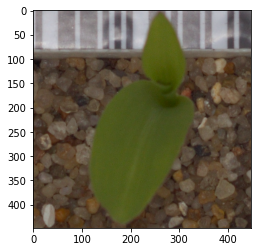

In [4]:
# V1 Data image
for i in list(df_train['image'])[0:1]:
    img = Image.open(train_dir + df_train['category'][0] + '/' + i)
    img.load()
#     data = np.asarray(img, dtype="float" )
    data = np.asarray(img, dtype="int")
    plt.imshow(data)
    plt.show()

## V2 Dataset

In [156]:
# Using V2 dataset
root_dir = '../datasets/plant_seedlings_v2/'
train_dir_v2 = root_dir + 'train/'
test_dir_v2 = '../datasets/plant-seedlings-classification/test/'

#### TRAINING ON V2 DATA ####
#convertering list of training data paths to df
v2_train_list = os.listdir(train_dir)
records_v2 = []
for category in v2_train_list:
    img_list = os.listdir(train_dir_v2 + category)
    for img in img_list:
        records_v2.append((img,category))
# records_v2.remove('nonsegmentedv2')
        
df_train_v2 = pd.DataFrame.from_records(records_v2,columns=['image','category'])

print(df_train_v2.head())


#### TESTEING ON V1 DATA ####
#looking at the test data
test_list = os.listdir(test_dir)
print('Train Data', len(df_train.index))
print('Test Data',type(test_list),len(test_list))
print('categories',os.listdir(train_dir))
print('# of categories', len(os.listdir(train_dir)))

train_dir = train_dir_v2
df_train = df_train_v2
train_list = v2_train_list

       image          category
0  311-2.png  Loose Silky bent
1    616.png  Loose Silky bent
2    703.png  Loose Silky bent
3    665.png  Loose Silky bent
4     86.png  Loose Silky bent
Train Data 5515
Test Data <class 'list'> 793
categories ['Loose Silky bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Sugar beet', 'Black grass', 'Common wheat', 'nonsegmentedv2', 'Common Chickweed', 'Cleavers', 'Small flowered Cranesbill', 'Fat Hen', 'Charlock']
# of categories 13


616.png


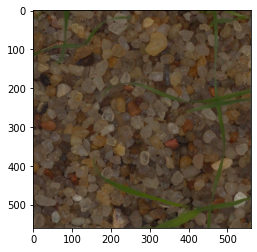

In [110]:
# V2 Data image
for j in list(df_train_v2['image'])[1:2]:
    print(j)
    img = Image.open(train_dir_v2 + df_train_v2['category'][0] + '/' + j)
    img.load()
#     data = np.asarray(img, dtype="float" )
    data = np.asarray(img, dtype="int")
    plt.imshow(data)
    plt.show()

In [129]:
categories = sorted(train_list, key=str.lower)
# categories2 = sorted(v2_train_list, key=str.lower)

## Normalizing data 
First, we will normalize our images and remove any images that possibly aren't square. Then we will create our X and y datasets.

***!!! DO NOT RUN, LOAD IN THE NUMPY ARRAYS AS SAVED TO FILES (CELLS BELOW)!!!***

In [113]:
dim_image = []
for i in (train_dir + df_train['category'] + '/' + df_train['image']):
    img = Image.open(i)
    data = img.size
    dim_image.append(data[0])
print('smallest image dimension', min(dim_image))

i_height = min(dim_image)
i_width = min(dim_image)

X = []
count = 0
bad_images = []
#df_train = df_train.drop(df_train.index[bad_images])
for i in (train_dir + df_train['category'] + '/' + df_train['image']):
    img = Image.open(i)
    img.load()
    img = np.asarray(img, dtype='float32')
    img = img/255
    data = transform.resize(img,(49,49))
    if data.size != 7203:
        bad_images.append(count)
#     plt.imshow(data)
#     plt.show()
#     X.append(data)
    count += 1
print('bad images',bad_images)

df_train = df_train.drop(df_train.index[bad_images])
for i in (train_dir + df_train['category'] + '/' + df_train['image']):
    img = Image.open(i)
    img.load()
    img = np.asarray(img, dtype='float32')
    img = img/255
    data = transform.resize(img,(49,49))
    X.append(data)

X = np.array(X)

y = np.array(df_train['category'].astype('category').cat.codes)

print('Done creating X and y.')
print('X Shape',X.shape)

smallest image dimension 49
bad images [0, 8, 46, 77, 82, 86, 121, 139, 163, 169, 252, 264, 446, 459, 469, 604, 606, 609, 622, 649, 746, 2531, 2591, 2650]
Done creating X and y.
X Shape (5515, 49, 49, 3)


## Loading Data

Save or Load Numpy arrays X, y

In [114]:
# Save X, y to file, ensure unique name

# XDIR = './v3X_dandelions.npy'
# YDIR = './v3Y_deandelions.npy'
# np.save(XDIR, X)
# np.save(YDIR, y)

In [14]:
# File structure
PREFIX = 'Xy-images/'
X_files = ['v1X.npy', 'v2X.npy']
y_files = ['v1Y.npy', 'v2Y.npy']

In [14]:
# Load X, y from files
XDIR = './v2X.npy'
YDIR = './v2Y.npy'
X = np.load(XDIR)
y = np.load(YDIR)


In [15]:
X_arrs = [np.load(PREFIX+f) for f in X_files]
Y_arrs = [np.load(PREFIX+f) for f in y_files]


In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_trains, X_tests, y_trains, y_tests = [], [], [], []
for i in range(0,len(X_arrs)):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_arrs[i], Y_arrs[i], test_size=0.2, random_state=42)
    X_trains.append(Xtrain)
    X_tests.append(Xtest)
    y_trains.append(ytrain)
    y_tests.append(ytest)

## Training

### **Convolutional Neural Network**

### Create Model

In [180]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

im_shape = (49,49,3)
# batch_size = 10
# epochs = 20
def build_cnn():
    cnn  = Sequential([
        Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=im_shape, padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D((2,2), padding='same'),
        Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D((2,2), padding='same'),
        Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D((2,2), padding='same'),
        Flatten(),
        Dense(50,activation='relu'),
        Dense(12, activation='softmax')
    ])

    cnn.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])#, 'loss', 'val_loss', 'val_accuracy'])
    
    return cnn

### Train on a test/train split

In [181]:
# Train all models, save histories for analysis
epochs = 25
batch_size = 10
test_train_histories = {}

for i in range(0,len(X_trains)):
    start = time.time()
    new_cnn = build_cnn()
    hist = new_cnn.fit(X_trains[i], y_trains[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_tests[i],y_tests[i]))
    # hist_v2 = cnn.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(X_test,y_test))
    test_train_histories['v' + str(i)] = {'history': hist, 'cnn_model': cnn}
    

    print('\nTotal train time (s): %d' % (time.time()-start))
    print()

Epoch 1/25
378/378 [==============================] - 11s 29ms/step - loss: 2.4008 - accuracy: 0.1409 - val_loss: 1.6028 - val_accuracy: 0.4197
Epoch 2/25
378/378 [==============================] - 11s 29ms/step - loss: 1.3756 - accuracy: 0.5138 - val_loss: 1.1410 - val_accuracy: 0.5920
Epoch 3/25
378/378 [==============================] - 12s 31ms/step - loss: 0.8883 - accuracy: 0.7028 - val_loss: 0.9769 - val_accuracy: 0.6712
Epoch 4/25
378/378 [==============================] - 13s 34ms/step - loss: 0.6934 - accuracy: 0.7738 - val_loss: 0.7620 - val_accuracy: 0.7431
Epoch 5/25
378/378 [==============================] - 13s 35ms/step - loss: 0.5334 - accuracy: 0.8199 - val_loss: 0.7537 - val_accuracy: 0.7611
Epoch 6/25
378/378 [==============================] - 13s 34ms/step - loss: 0.4266 - accuracy: 0.8512 - val_loss: 0.8570 - val_accuracy: 0.7304
Epoch 7/25
378/378 [==============================] - 13s 34ms/step - loss: 0.3595 - accuracy: 0.8756 - val_loss: 0.7972 - val_accuracy:

### Training final model on all data

In [116]:
# Training on ALL data
# combine X, y arrays
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

final_histories = {}

for i in range(0,len(X_arrs)):
    start = time.time()
    
    new_cnn = build_cnn()
    
    epochs = 25
    batch_size = 20
    final_hist = new_cnn.fit(X_arrs[i], Y_arrs[i], batch_size=batch_size, epochs=epochs, verbose=1)# callbacks=[es])
    final_histories['v' + str(i)] = {'history':final_hist. 'cnn_model': cnn} # save train histories for graphing

    print('Total train time (s): %d' % (time.time()-start))    

Epoch 1/25
276/276 [==============================] - 15s 54ms/step - loss: 0.5422 - accuracy: 0.8758
Epoch 2/25
276/276 [==============================] - 15s 53ms/step - loss: 0.1178 - accuracy: 0.9628
Epoch 3/25
276/276 [==============================] - 17s 63ms/step - loss: 0.0470 - accuracy: 0.9868
Epoch 4/25
276/276 [==============================] - 18s 64ms/step - loss: 0.0230 - accuracy: 0.9944
Epoch 5/25
276/276 [==============================] - 17s 62ms/step - loss: 0.0158 - accuracy: 0.9951
Epoch 6/25
276/276 [==============================] - 17s 63ms/step - loss: 0.0049 - accuracy: 0.9993
Epoch 7/25
276/276 [==============================] - 17s 63ms/step - loss: 0.0162 - accuracy: 0.9960
Epoch 8/25
276/276 [==============================] - 17s 63ms/step - loss: 0.0775 - accuracy: 0.9773
Epoch 9/25
276/276 [==============================] - 17s 63ms/step - loss: 0.0505 - accuracy: 0.9859
Epoch 10/25
276/276 [==============================] - 18s 66ms/step - loss: 0.032

#### Final training model loss, accuracy

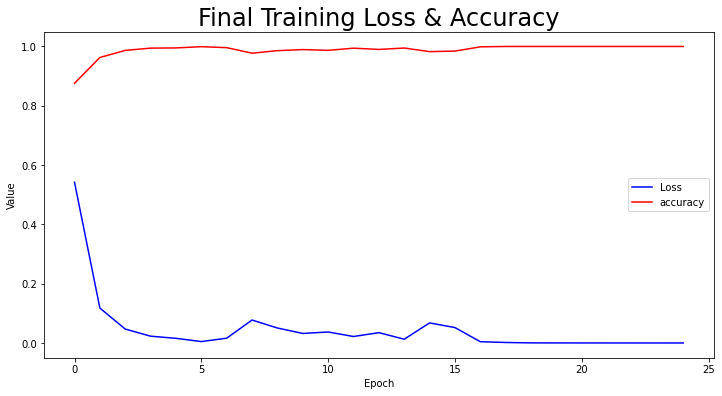

In [145]:
for i in final_histories:
    data_version = i[0] + str(int(i[1])+1)
    
    figname = './figures/final-training-model_' + data_version + '.jpg' # save each version image
    # final_hist = hist
    fig = plt.figure(figsize=(12, 6))
    plt.plot(final_histories[i]['history'].history['loss'], color='b', label='Loss')
    plt.plot(final_histories[i]['history'].history['accuracy'], color='r', label='accuracy')
    plt.legend()

    plt.title('Final Training Loss & Accuracy, %s' % data_version, fontsize='24')
    plt.xlabel('Epoch')
    plt.ylabel('Value')

    plt.savefig(figname, dpi=150)
    plt.show()

## Saving Models

JSON deprecated, use tf savedmodel

In [124]:
# SAVE MODEL as a TF SavedModel format

MODEL_FILE = 'saved_models/crop_weed_model'
# FINAL_MODEL = 'saved_models/final_crop_weed_model'
FINAL_MODEL = 'saved_models/final_crop_weed_model_v2'

# cnn.save(MODEL_FILE)
# OR
keras.models.save_model(cnn,
#                        MODEL_FILE,
                       FINAL_MODEL,
                       overwrite=True,
                       include_optimizer=True,
                       save_format=None, # tf or h5 (h5 is older version for TF1)
                       signatures=None,
                       options=None)
print('Saved Model in', FINAL_MODEL)

INFO:tensorflow:Assets written to: saved_models/final_crop_weed_model_v2/assets
Saved Model in saved_models/final_crop_weed_model_v2


In [2]:
# LOAD A MODEL

MODEL_FILE = 'saved_models/crop_weed_model'
# FINAL_MODEL = 'saved_models/final_crop_weed_model'
FINAL_MODEL = 'saved_models/final_crop_weed_model_v2'

# loading:
loaded_cnn = keras.models.load_model(
#                                     MODEL_FILE,
                                    FINAL_MODEL,
                                    custom_objects=None,
                                    compile=True
                                    )

print("Loaded Model", FINAL_MODEL)


Loaded Model saved_models/final_crop_weed_model_v2


## Using model to predict seedling type:

- Maps predictions to expected outcomes in a digestible format
- Programatically provides an prediction method -- i.e. consumable by another program

Outputs a combined list of how many accurate predictions were made per plant type.\
**3 of each plant were tested from the original data**. Additional images from the internet were included for most plant types.\
The internet images were picked based on plant age and near-look to source data. For more detail on these decisions, see final writeup report

The following 2 cells follow an older data structure of labelled images.
This structure could be useful for quickly building a classifier to return if a certain object should be sprayed/pulled or not.

In [108]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, metrics
import seaborn as sns

test_generator = ImageDataGenerator()
test_data_gen = test_generator.flow_from_directory('../datasets/predictions/',
                                                  target_size=(49,49),
                                                  batch_size=10,
                                                  shuffle=False)

test_steps_per_epoch = np.math.ceil(test_data_gen.samples / test_data_gen.batch_size)
predictions = loaded_cnn.predict_generator(test_data_gen, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data_gen.classes
class_labels = list(test_data_gen.class_indices.keys())

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# plot confusion matrix
con_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
print(matrix)

Found 38 images belonging to 12 classes.
                           precision    recall  f1-score   support

              Black grass       0.20      0.33      0.25         3
                 Charlock       0.75      1.00      0.86         3
                 Cleavers       1.00      0.67      0.80         3
         Common Chickweed       0.50      0.67      0.57         3
             Common Wheat       0.00      0.00      0.00         3
                  Fat Hen       1.00      1.00      1.00         3
         Loose Silky bent       1.00      0.67      0.80         3
                    Maize       0.43      0.75      0.55         4
        Scentless Mayweed       1.00      0.67      0.80         3
          Shepherds Purse       1.00      1.00      1.00         3
Small flowered Cranesbill       1.00      1.00      1.00         3
               Sugar beet       1.00      0.75      0.86         4

                 accuracy                           0.71        38
                mac

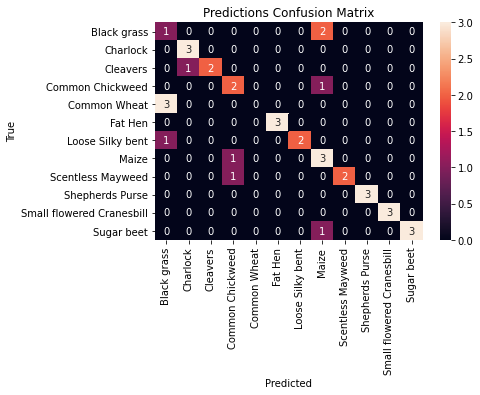

In [113]:
plt.figure()
sns.heatmap(con_matrix, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predictions Confusion Matrix')
# plt.tight_layout()
plt.savefig('./figures/prediction_heatmap_v2_model.jpg', dpi=150)

# Print out label, number mapping if desired
# for label in range(len(class_labels)):
#     print(label, ':', class_labels[label])

4412
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Text(0.5, 1.0, 'Test Data Confusion Matrix')

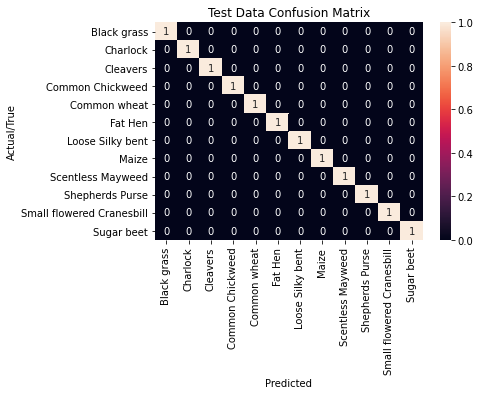

In [105]:
## Confusion matrix on test data (used in training)
predicts = loaded_cnn.predict(X_trains[1])
train = y_trains[1]
y_pred = (predicts > 0.5)
print(train.size)
matrix = metrics.confusion_matrix(train, 
                                  y_pred.argmax(axis=1),
                                 normalize='true')

print(matrix)

ax = plt.subplot()

sns.heatmap(matrix, annot=True, fmt='g', ax=ax, xticklabels=categories, yticklabels=categories)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual/True')
ax.set_title('Test Data Confusion Matrix')
# ax.xaxis.set_ticklabels(categories)
# ax.yaxis.set_ticklabels(categories)


## Metrics

### Train & Test metrics

In [176]:
def results(history, pltname, figname):
#     plt.plot(history.history['accuracy'], label='accuracy')
#     plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.xticks(list(range(len(history.history['accuracy']))))
#     plt.ylim([0, 1])
#     plt.legend(loc='lower right')
    
    fig, ax = plt.subplots(2,1, figsize=(12, 8))
    ax[0].plot(history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    ax[0].set_ylabel('Value')
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Percent (%)')
    legend = ax[1].legend(loc='best', shadow=True)
    fig.suptitle(pltname)
    if figname:
        plt.savefig(figname, dpi=150)    
    plt.show()

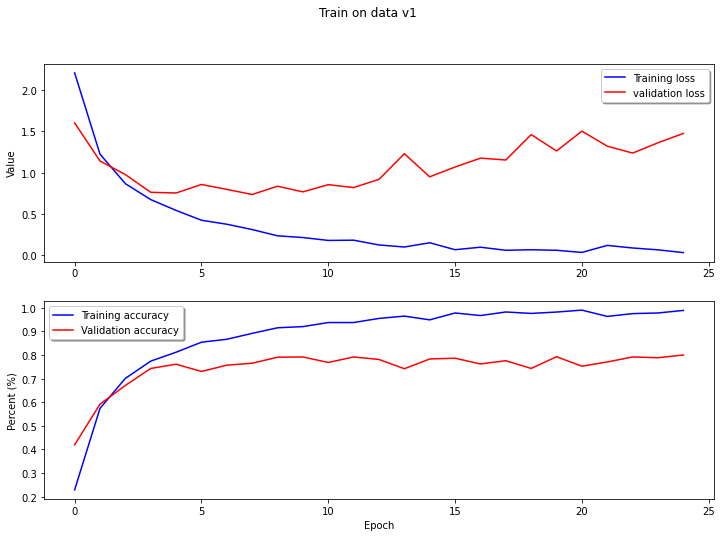

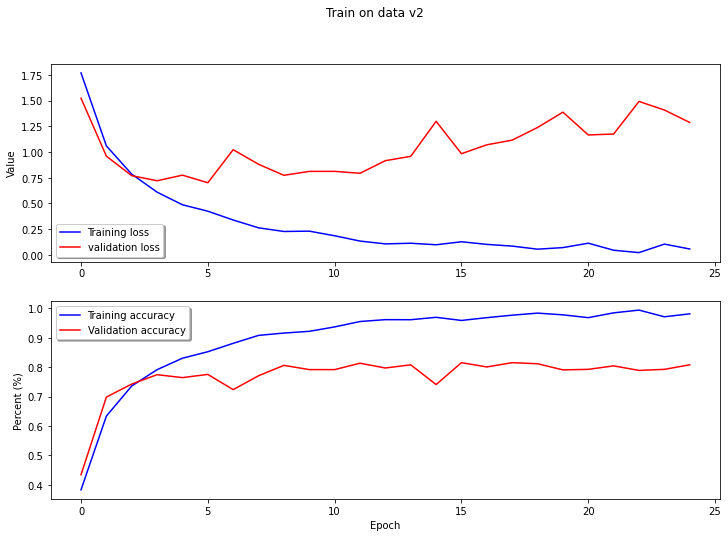

In [182]:
for i in test_train_histories:
    data_version = i[0] + str(int(i[1])+1)
    results(test_train_histories[i]['history'], 'Train on data %s' % data_version, 'figures/20_epoch_train_%s' % data_version)

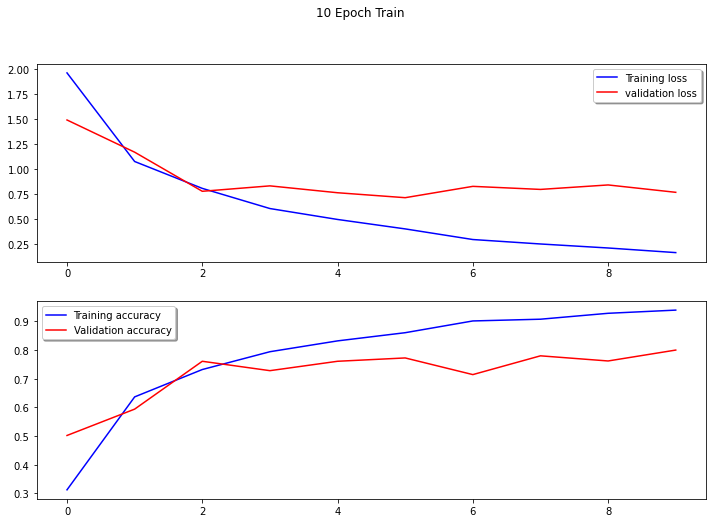

In [91]:
results(hist, '10 Epoch Train', './figures/10_epoch.jpg')

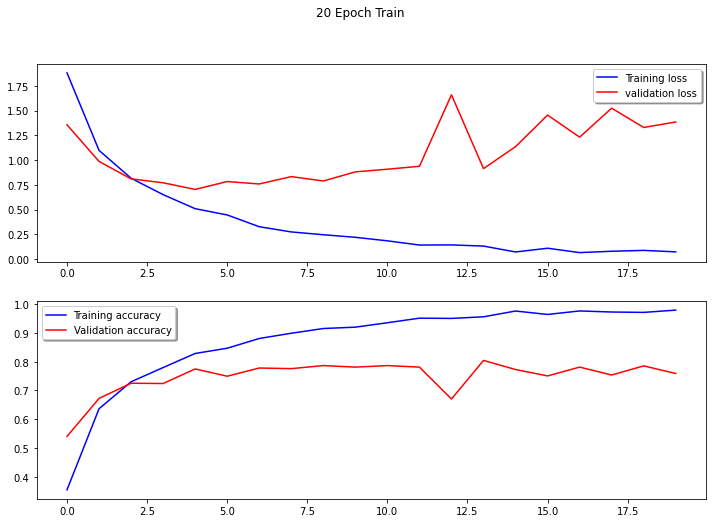

In [92]:
results(hist_v2, '20 Epoch Train', './figures/20_epoch.jpg')

#### Written Analysis

In [171]:
from keras.utils.vis_utils import plot_model
# import pydot

plot_model(model=loaded_cnn, to_file='CNN_MODEL_VISUAL.jpg', show_shapes=True, show_layer_names=True)


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [3]:
loaded_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 49, 49, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       7